In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn=pd.read_csv('churn_prediction.csv')
churn.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
customer_id                       28382 non-null int64
vintage                           28382 non-null int64
age                               28382 non-null int64
gender                            27857 non-null object
dependents                        25919 non-null float64
occupation                        28302 non-null object
city                              27579 non-null float64
customer_nw_category              28382 non-null int64
branch_code                       28382 non-null int64
days_since_last_transaction       25159 non-null float64
current_balance                   28382 non-null float64
previous_month_end_balance        28382 non-null float64
average_monthly_balance_prevQ     28382 non-null float64
average_monthly_balance_prevQ2    28382 non-null float64
current_month_credit              28382 non-null float64
previous_month_credit             28382 non-null

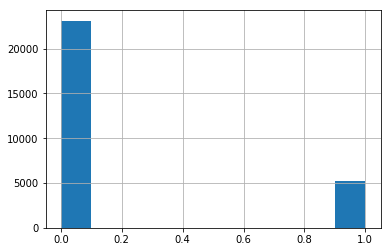

In [4]:
#Let visualize the target variable 'churn'
churn.churn.hist()

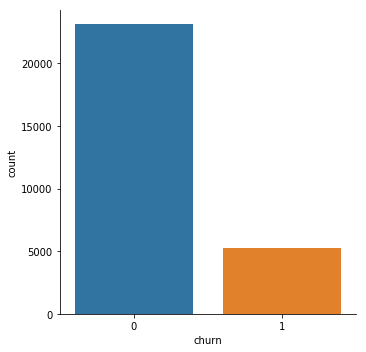

In [5]:
#second way
sns.catplot('churn',kind='count',data=churn)

In [6]:
#Let explore the numerical features
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,28382.0,15143.508667,8746.454456,1.00,7557.2500,15150.500,22706.7500,30301.00
vintage,28382.0,2364.336446,1610.124506,180.00,1121.0000,2018.000,3176.0000,12899.00
age,28382.0,48.208336,17.807163,1.00,36.0000,46.000,60.0000,90.00
dependents,25919.0,0.347236,0.997661,0.00,0.0000,0.000,0.0000,52.00
city,27579.0,796.109576,432.872102,0.00,409.0000,834.000,1096.0000,1649.00
customer_nw_category,28382.0,2.225530,0.660443,1.00,2.0000,2.000,3.0000,3.00
branch_code,28382.0,925.975019,937.799129,1.00,176.0000,572.000,1440.0000,4782.00
days_since_last_transaction,25159.0,69.997814,86.341098,0.00,11.0000,30.000,95.0000,365.00
current_balance,28382.0,7380.551804,42598.711923,-5503.96,1784.4700,3281.255,6635.8200,5905904.03
previous_month_end_balance,28382.0,7495.770548,42529.345225,-3149.57,1906.0000,3379.915,6656.5350,5740438.63


On average customers have been loyal to bank for 2400 days or 6.5 years.
On average customers have 48 years.


In [7]:
#Let see customer networth category and balance features relation
balance_cols=['current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
        'current_month_credit','previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance']

In [8]:
churn.groupby('customer_nw_category')[balance_cols].mean()

,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
customer_nw_category,,,,,,,,,,
1,12883.682913,13436.613544,13098.982716,11810.444511,7728.400137,9409.866028,7911.434080,8086.710342,12878.068674,13242.281037
2,7773.279345,7744.492544,7839.095235,7433.073141,3749.500743,2893.806560,3894.684063,3163.730233,7858.371677,7794.672359
3,4795.520175,4957.438675,4947.972060,4959.714499,1401.650598,1535.054349,1758.351527,1851.125018,4873.170891,4954.843500


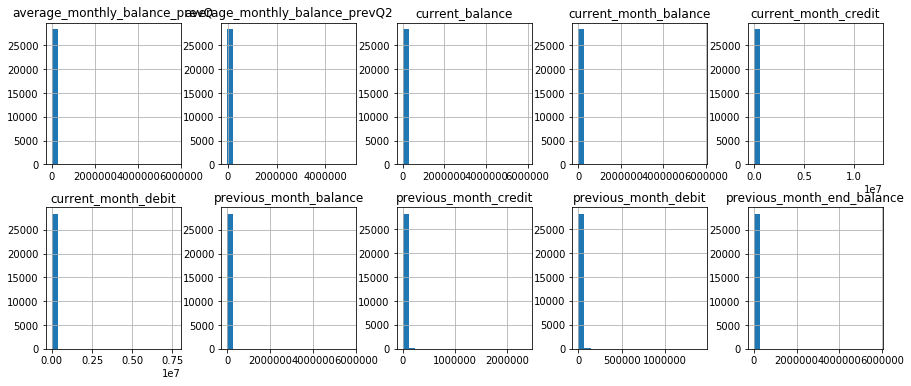

In [9]:
#we can see distributions of these numerical features of balances
churn[balance_cols].hist(bins=20,figsize=(15,6),layout=(2,5))
plt.show()

In [10]:
#We notice that we need to transform this data using log transformation
#As expected customer with higher income of category1 have higher values in the balance related accounts

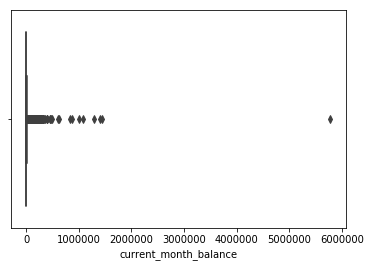

In [11]:
sns.boxplot(churn['current_month_balance'],data=churn)

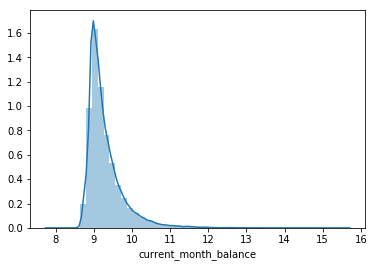

In [12]:
temp=np.log(churn['current_month_balance']+6000)
sns.distplot(temp)
plt.show()

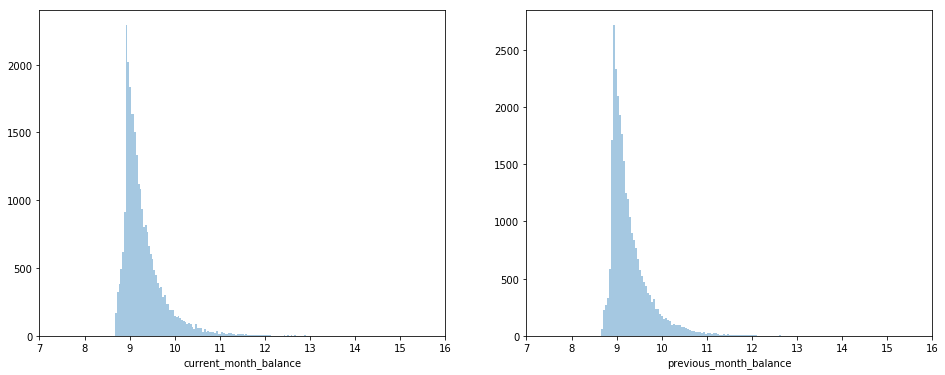

In [13]:
#Let compare current month balance with previous month balance
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
xmin = 7
xmax = 16
# Current Month Average Balance
temp = np.log(churn['current_month_balance'] + 6000) # To account for negative values we add a constant value within log
ax1.set_xlim([xmin,xmax])
ax1.set(xlabel='log of average balance of current month')
sns.distplot(temp, kde = False, bins = 200, ax = ax1)


# Previous month average balance
temp = np.log(churn['previous_month_balance'] + 6000) # To account for negative values we add a constant value within log
ax2.set_xlim([xmin,xmax])
ax2.set(xlabel='log of average balance of previous month')
sns.distplot(temp, kde = False, bins = 200, ax = ax2)


plt.show()

They have similiar distributions and are right skewed both.

### BIVARIATE ANALYSIS

In [14]:
#FIrstly we will use the current and previous month balances towards churn target variable, initially
#we will transform all features using log transforamtion bc of outliers and then use scaterplott to visualize
cols=['current_balance',
       'previous_month_end_balance','current_month_balance', 'previous_month_balance']
df1=pd.DataFrame()
for i in cols:
    df1[str('log')+i]=np.log(churn[i]+6000)
df1['churn']=churn['churn']


In [15]:
df1.head(5)

,logcurrent_balance,logprevious_month_end_balance,logcurrent_month_balance,logprevious_month_balance,churn
0,8.917138,8.917138,8.917138,8.917138,0
1,9.340524,9.595920,9.433226,9.601545,0
2,9.201618,9.377150,9.306221,9.312007,0
3,9.023036,9.023036,9.023036,8.945045,1
4,8.843286,8.909468,8.875867,8.946005,1


C:\Users\perdorues\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\perdorues\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\perdorues\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


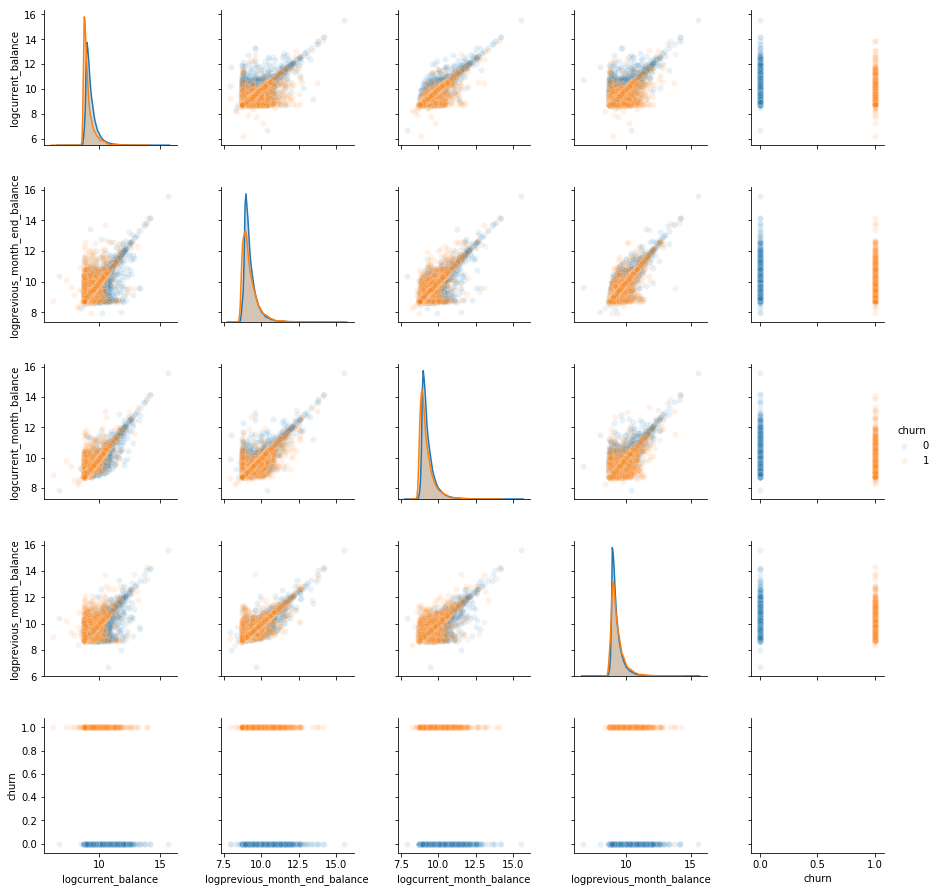

In [16]:
sns.pairplot(df1,vars=df1.columns, hue = 'churn',plot_kws={'alpha':0.1})

In [17]:
#We see that tendency is that the lower the balance the higher are the chances to churn
#Distributiond of balances are also right skewed.

### CREDIT-DEBIT-CHURN

In [18]:
CR_DB=['current_month_credit','previous_month_credit', 
              'current_month_debit', 'previous_month_debit']
df2=pd.DataFrame()
for i in CR_DB:
    df2[str('log')+i]=np.log(churn[i]+6000)
df2['churn']=churn['churn']
df2.head(3)

,logcurrent_month_credit,logprevious_month_credit,logcurrent_month_debit,logprevious_month_debit,churn
0,8.699548,8.699548,8.699548,8.699548,0
1,8.699608,8.699608,9.348908,8.716136,0
2,8.699616,8.699616,9.396549,8.741812,0


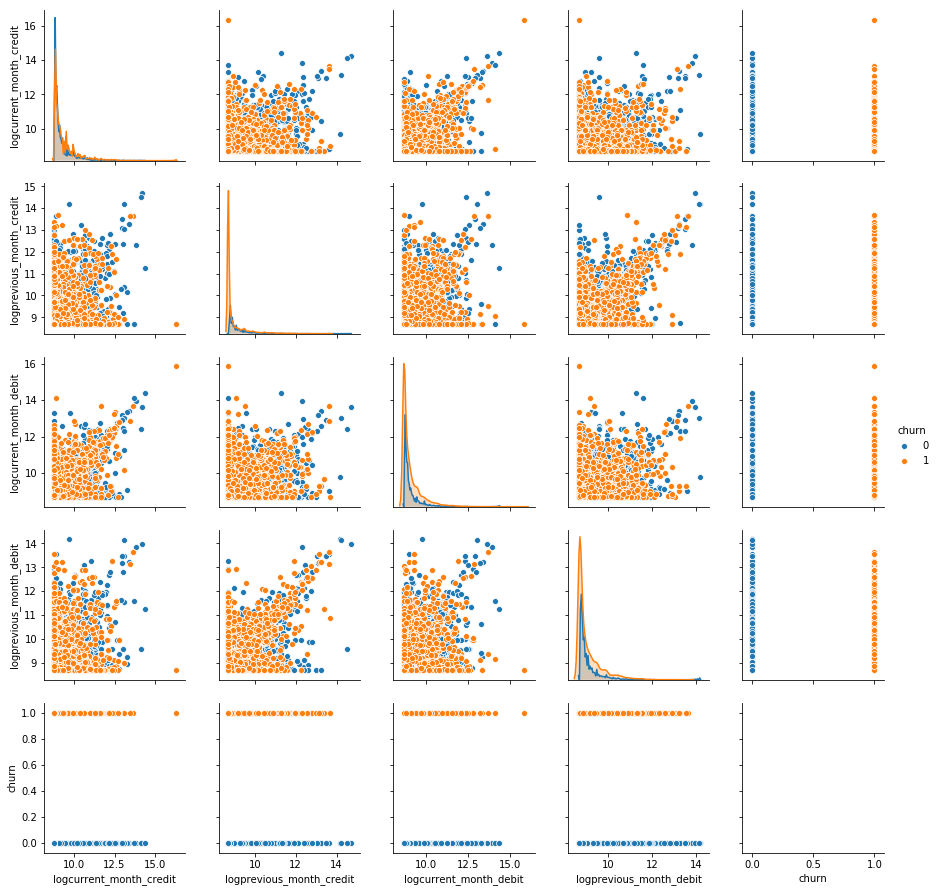

In [19]:
sns.pairplot(df2,vars=df2.columns,hue='churn')
plt.show()

Bimodal distribution/Double Bell Curve shows that there are 2 different types of customers with 2 brackets of credit and debit. Now, during the modeling phase, these could be considered as a seperate set of customers.

### Removing outliers in balance data

In [20]:
df_b=churn[['current_balance','previous_month_end_balance',
                'current_month_balance', 'previous_month_balance']]

In [21]:
low=0.01
high=0.99
df_quart=df_b.quantile([low,high])
df_quart

,current_balance,previous_month_end_balance,current_month_balance,previous_month_balance
0.01,47.6892,74.1782,207.4563,320.0833
0.99,64781.3626,66212.9116,64051.4092,62877.4302


In [22]:
#First we remove the outliers and then transform in log form
churn_bal=df_b.apply(lambda x: x[(x>df_quart.loc[low,x.name])& (x<df_quart.loc[high,x.name])],axis=0)
balance_data=pd.DataFrame()
cols=['current_balance','previous_month_end_balance',
                'current_month_balance', 'previous_month_balance']
for i in cols:
    balance_data[str('log')+i]=np.log(churn_bal[i]+6000)
    
balance_data['churn']=churn['churn']
balance_data.head(5)

,logcurrent_balance,logprevious_month_end_balance,logcurrent_month_balance,logprevious_month_balance,churn
0,8.917138,8.917138,8.917138,8.917138,0
1,9.340524,9.595920,9.433226,9.601545,0
2,9.201618,9.377150,9.306221,9.312007,0
3,9.023036,9.023036,9.023036,8.945045,1
4,8.843286,8.909468,8.875867,8.946005,1


C:\Users\perdorues\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\perdorues\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


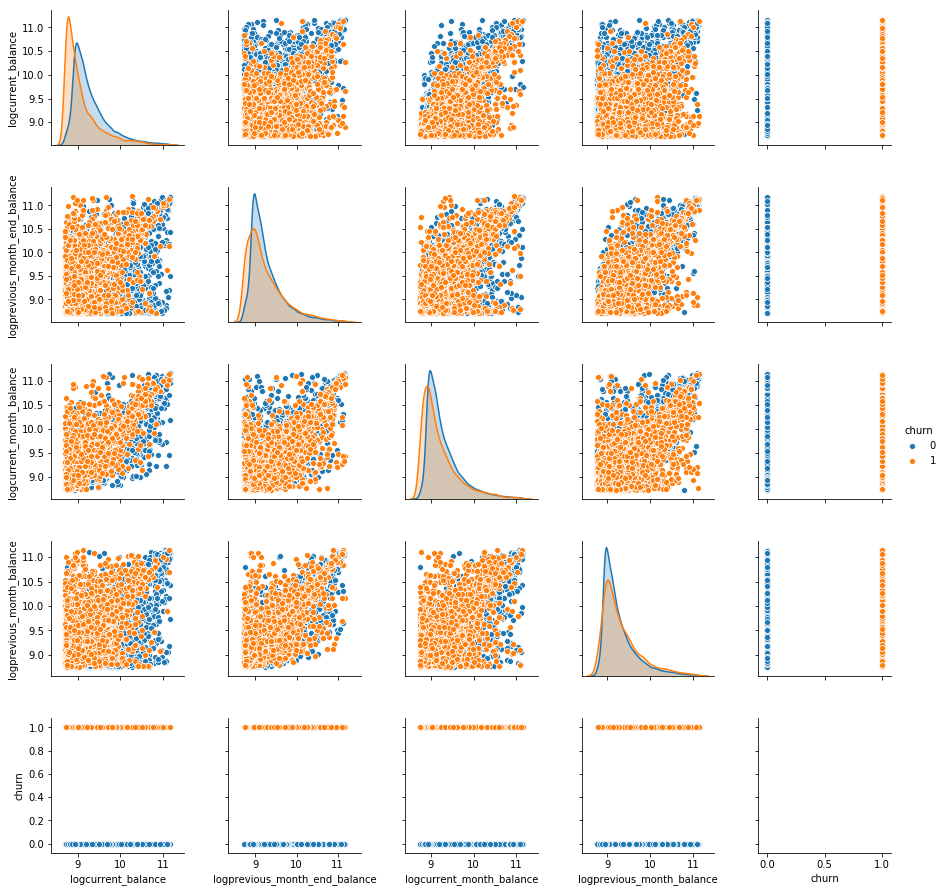

In [23]:
sns.pairplot(balance_data,vars=balance_data.columns,hue='churn')
plt.show()

C:\Users\perdorues\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\perdorues\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


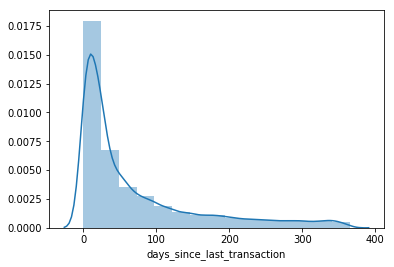

In [24]:
sns.distplot(churn.days_since_last_transaction,bins=15)

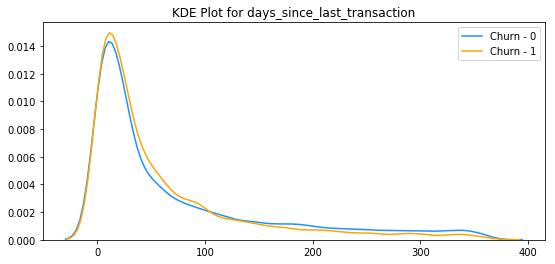

In [25]:
#to have a look of above distribution on churn let build the function

def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE Plot for {}".format(feature))
    ax0 = sns.kdeplot(churn[churn['churn'] == 0][feature].dropna(), color= 'dodgerblue', label= 'Churn - 0')
    ax1 = sns.kdeplot(churn[churn['churn'] == 1][feature].dropna(), color= 'orange', label= 'Churn - 1')

kdeplot('days_since_last_transaction')


### Categorical Variables

UNIVARIATE ANALYSIS

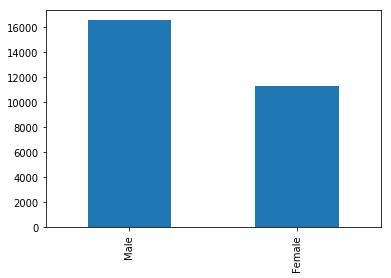

In [26]:
churn['gender'].value_counts().plot.bar()

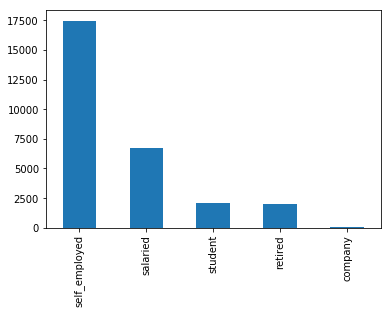

In [27]:
churn['occupation'].value_counts().plot.bar()

  ### BIVARIATE ANALYSIS

In [28]:
def barplot_percentages(feature):
    #fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
    ax1 = churn.groupby(feature)['churn'].value_counts(normalize=True).unstack()
    ax1.plot(kind='bar', stacked='True')
    int_level = churn[feature].value_counts()

    plt.figure(figsize=(8,4))
    sns.barplot(int_level.index, int_level.values, alpha=0.8)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(str(feature), fontsize=12)
    plt.show()

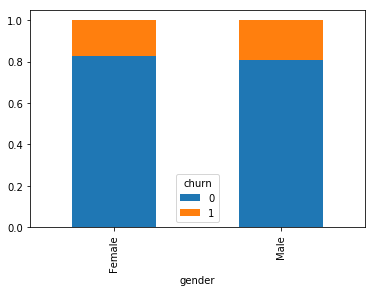

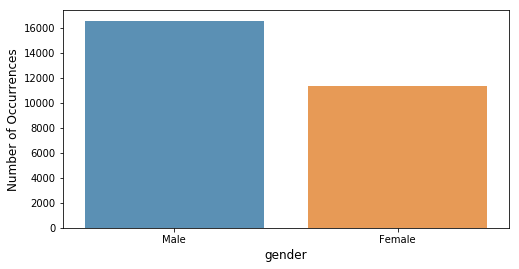

In [29]:
barplot_percentages("gender")

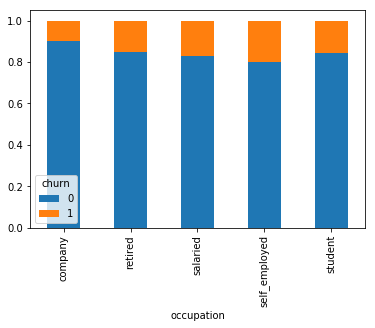

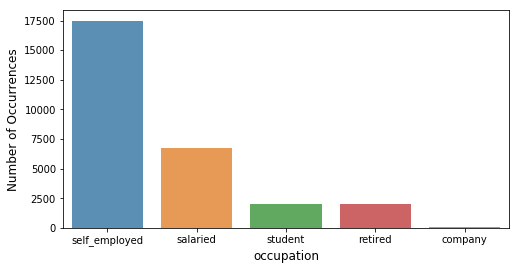

In [30]:
barplot_percentages("occupation")

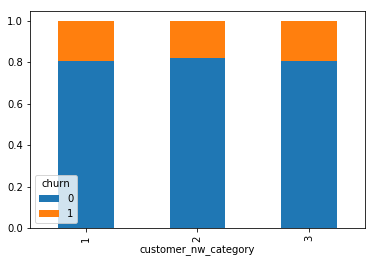

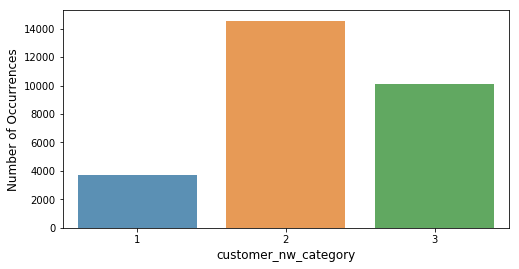

In [31]:
barplot_percentages("customer_nw_category")

In [32]:
#Let build bins for city feature , so grupping values of this feature in different few categories

churn['city_category']=churn['city'].copy()
counts=churn.city.value_counts()

In [33]:
churn.city_category[churn['city'].isin(counts[counts>900].index)]=3
churn.city_category[churn['city'].isin(counts[counts<900].index) & churn['city_category'].isin(counts[counts>=350].index)]=2
churn.city_category[churn['city'].isin(counts[counts<350].index) & churn['city_category'].isin(counts[counts>=100].index)]=1
churn.city_category[churn['city'].isin(counts[counts<100].index)]=0
churn['city_category']=pd.to_numeric(churn['city_category'],errors='coerce')



C:\Users\perdorues\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\perdorues\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\perdorues\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\User

In [34]:
#churn['city_category'].plot.bar()

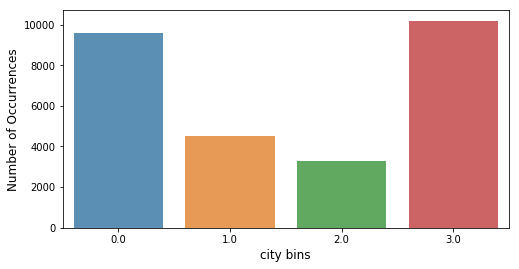

In [35]:
int_level = churn['city_category'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('city bins', fontsize=12)
plt.show()

In [37]:
#Just testing another way of binning with pd.cut
values_city=pd.cut(churn.city,bins=[0,100,350,900,1500],labels=[0,1,2,3])

In [39]:
values_city.value_counts()

3    11658
2     8809
1     3888
0     1541
Name: city, dtype: int64

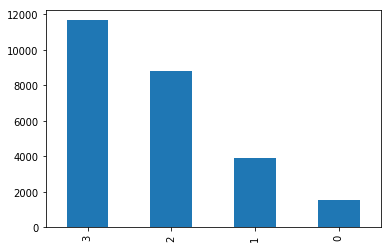

In [45]:
values_city.value_counts().plot.bar()